# A Naturalness Preserved Fast Dehazing Algorithm Using HSV Color Space

## PROPOSED ALGORITHM

<img src="../imgs/formula/workflow.png">

## Transformacion a espacio de color HSV 

### Imagen con Niebla

In [1]:
from skimage.color import rgb2hsv
from skimage.util import img_as_float64
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Print Image

In [2]:
def printImage(_list,Name_list):
    axes=[]
    fig=plt.figure(figsize=(16,14))
    for a in range(len(_list)):
        b = _list[a]
        axes.append( fig.add_subplot(2,2, a+1) )
        subplot_title=("Subplot"+str(Name_list[a]))
        axes[-1].set_title(subplot_title)  
        plt.imshow(b,cmap="gray")
    fig.tight_layout()
    plt.show()

In [3]:

img = cv2.imread('D:/EntornosPython/imgs/Middlebury_Hazy/Backpack_Hazy.bmp')
 
print(img.shape)
# let's downscale the image using new  width and height
down_width = 705#735
down_height = 480#504
down_points = (down_width, down_height)
img_resized = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)
print(img_resized.shape)


(2016, 2940, 3)
(480, 705, 3)


In [4]:
print(img_resized.dtype)

uint8


In [5]:
# Convert to HSV colour space

## HSV openCV
resultCV = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)

# HSV Skimage
img_resizedfloat = img_as_float64(img_resized)
resultSkimage = rgb2hsv(img_resizedfloat)


cv2.imshow("Image Original",img_resized)
cv2.imshow("HSV using skimage",resultSkimage)
cv2.imshow("HSV using openCV",resultCV)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
print(resultCV.dtype)

uint8


In [10]:
channel_H,channel_S,channel_V = cv2.split (resultCV)
merged = cv2.merge([channel_H,channel_S,channel_V])
merged2 = cv2.merge([channel_V,channel_S,channel_H])

# cv2.imshow("Hue 1", channel_H)
# cv2.imshow("Saturation 1", channel_S)
# cv2.imshow("Valor 1", channel_V)
# cv2.imshow("merged 1", merged)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

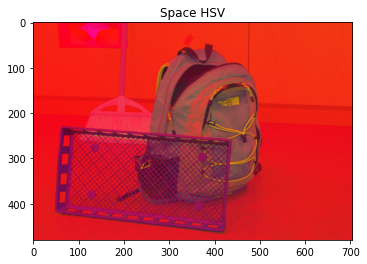

In [11]:
fig, ax = plt.subplots()
ax.set_title("Space HSV")  
plt.imshow(merged2,cmap='gray')

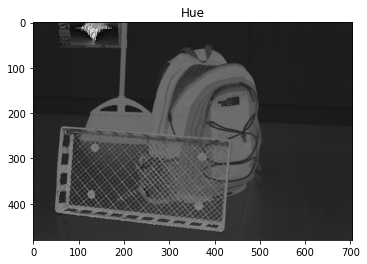

In [12]:
fig, ax = plt.subplots()
ax.set_title("Hue")  
plt.imshow(channel_H,cmap='gray')

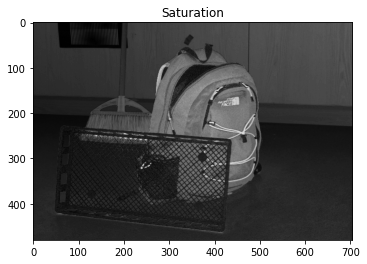

In [14]:
fig, ax = plt.subplots()
ax.set_title("Saturation")  
plt.imshow(channel_S,cmap='gray')

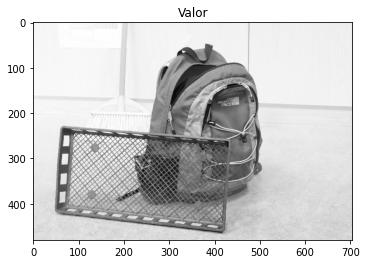

In [13]:
fig, ax = plt.subplots()
ax.set_title("Valor")  
plt.imshow(channel_V,cmap='gray')

### Imagen Ground Truth

In [15]:

imgReal = cv2.imread('D:/EntornosPython/imgs/Middlebury_GT/Backpack_im0.png')
print(imgReal.shape)

# let's downscale the image using new  width and height
down_width = 705#735
down_height = 480#504
down_points = (down_width, down_height)
img_resizedReal = cv2.resize(imgReal, down_points, interpolation= cv2.INTER_LINEAR)
print(img_resizedReal.shape)


(2016, 2940, 3)
(480, 705, 3)


In [16]:
print(img_resizedReal.dtype)

uint8


In [17]:
# Convert to HSV colour space


## HSV openCV
resultCVReal = cv2.cvtColor(img_resizedReal, cv2.COLOR_BGR2HSV)

# HSV Skimage
img_resizedReal = img_as_float64(img_resizedReal)
resultSkimageRealFloat = rgb2hsv(img_resizedReal)


cv2.imshow("Image Original",img_resizedReal)
cv2.imshow("HSV using skimage",resultSkimageRealFloat)
cv2.imshow("HSV using openCV",resultCVReal)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
channelReal_H,channelReal_S,channelReal_V = cv2.split (resultCVReal)
mergedReal = cv2.merge([channelReal_H,channelReal_S,channelReal_V])

# cv2.imshow("Hue 1", channelReal_H)
# cv2.imshow("Saturation 1", channelReal_S)
# cv2.imshow("Valor 1", channelReal_V)
# cv2.imshow("merged 1", mergedReal)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

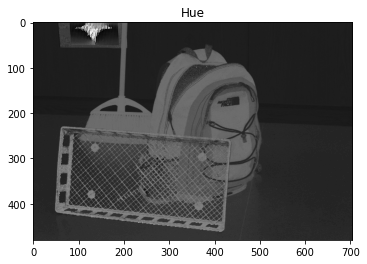

In [19]:
fig, ax = plt.subplots()
ax.set_title("Hue")  
plt.imshow(channelReal_H,cmap='gray')

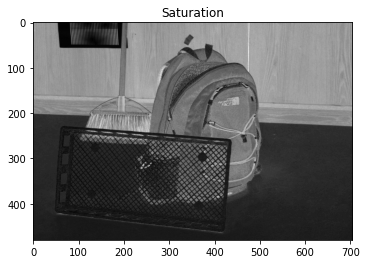

In [20]:
fig, ax = plt.subplots()
ax.set_title("Saturation")  
plt.imshow(channelReal_S,cmap='gray')

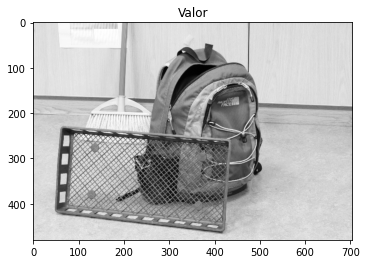

In [21]:
fig, ax = plt.subplots()
ax.set_title("Valor")  
plt.imshow(channelReal_V,cmap='gray')

## Comparacion entre del canales HUE,Valor,Saturacion de las imágenes con niebla y las imágenes reales.

### Separacion de canales en imagen con niebla

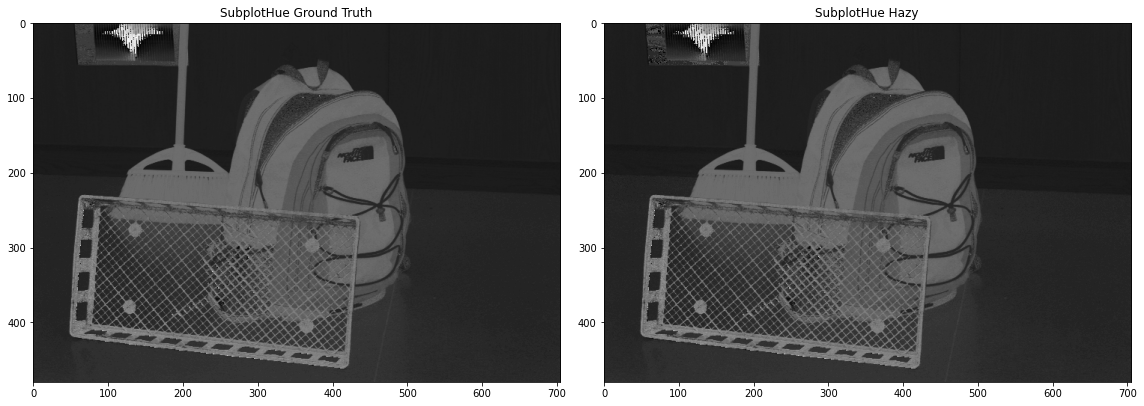

In [22]:
printImage([channelReal_H,channel_H],["Hue Ground Truth","Hue Hazy"])


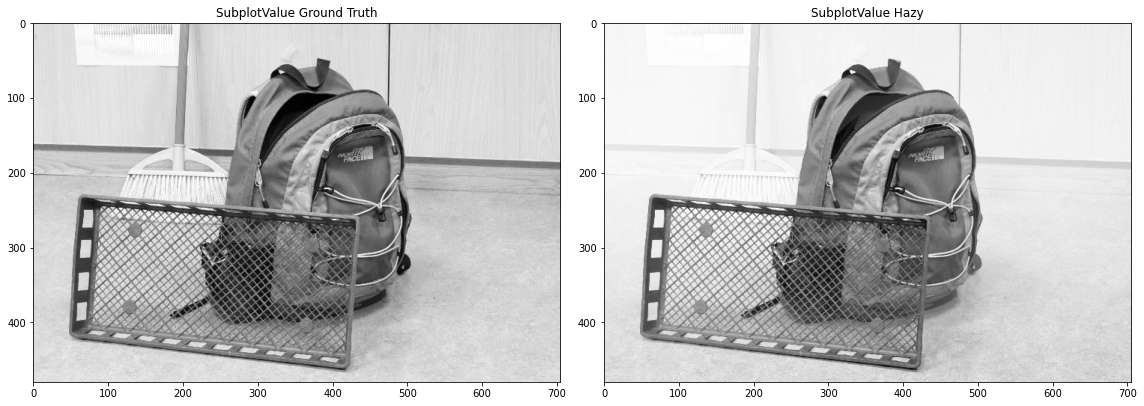

In [23]:
printImage([channelReal_V,channel_V], ["Value Ground Truth","Value Hazy"])


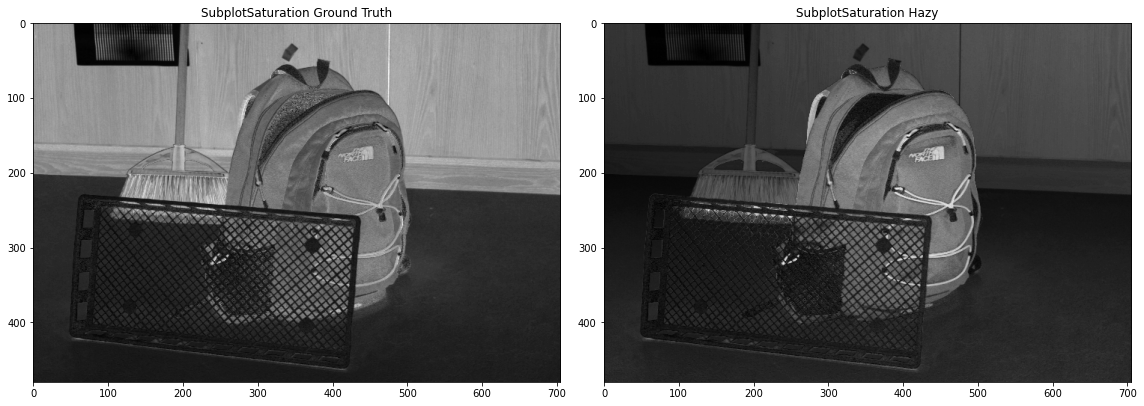

In [25]:
printImage([channelReal_S,channel_S], ["Saturation Ground Truth","Saturation Hazy"])


In [26]:
cv2.imshow("Hue Ground Truth", channelReal_H)
cv2.imshow("Hue Hazy", channel_H)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
cv2.imshow("Value Ground Truth", channelReal_V)
cv2.imshow("Value Hazy", channel_V)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
cv2.imshow("Saturation Ground Truth", channelReal_S)
cv2.imshow("Saturation Hazy", channel_S)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
from skimage.metrics import structural_similarity as ssim

In [28]:

# Compute SSIM between two images
(score, diff) = ssim(channelReal_H, channel_H, full=True)
#print("Image similarity", score)
print("SSIM: {}".format(score))


SSIM: 0.9863929090073619


In [29]:
# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# cv2.imshow('before', channelReal_H)
# cv2.imshow('after', channel_H)
# cv2.imshow('diff',thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

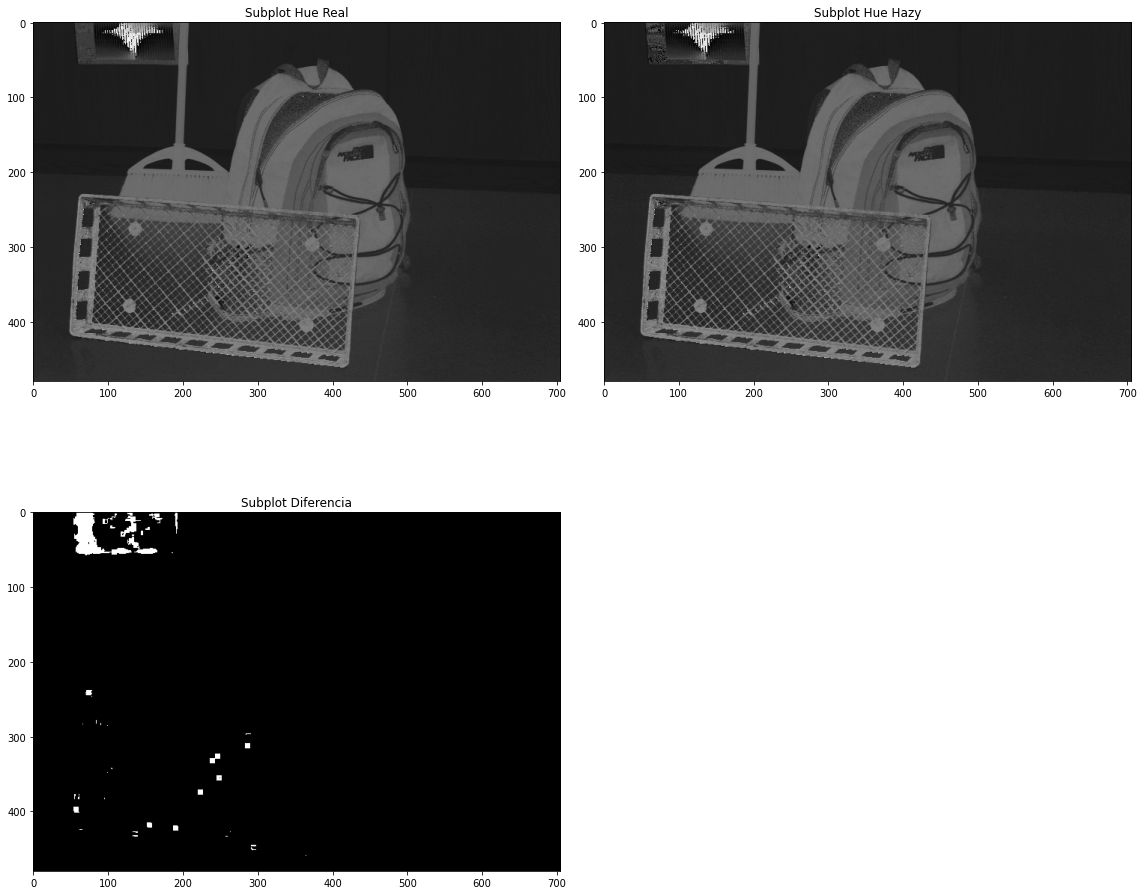

In [30]:

printImage([channelReal_H,channel_H,thresh],[" Hue Real"," Hue Hazy"," Diferencia"])


## INTENSITY RECOVERY BY OPENING OPERATION

In [31]:
#imgBackpack = cv2.imread('D:/EntornosPython/imgs/Middlebury_Hazy/Backpack_Hazy.bmp')

cv2.imshow('Ground Truth',img_resized )
cv2.waitKey(0)
cv2.destroyAllWindows()


### Calculate minimum value in RGB channels

<img src="../imgs/formula/minimumchannel.png">

In [32]:
def getMinChannel(img):
    if len(img.shape)==3 and img.shape[2]==3:
        pass
    else:
        print("bad image shape, input must be color image")
        return None
    
    return np.min(img, axis=2)

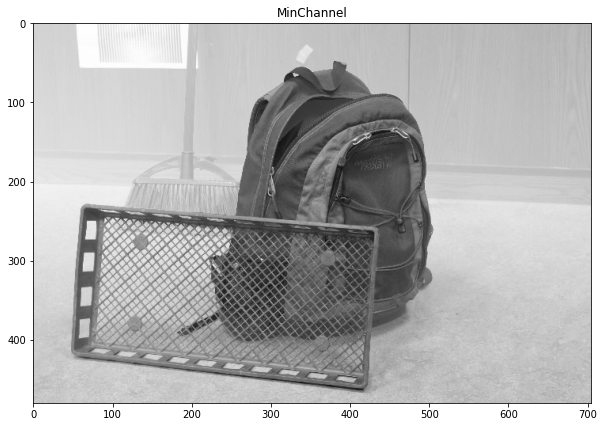

In [34]:
minChannel = getMinChannel(img_resized)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("MinChannel")  
plt.imshow(minChannel,cmap='gray')

In [35]:
print(img_resized[0][0])
print(minChannel[0][0])

[215 238 248]
215


### Modified morphological opening operation to Imin.

<img src="../imgs/formula/modifiedoperationmodificada.png">

In [48]:
  
kernelR1 = np.ones((31,31), np.uint8)  
img_erosion = cv2.erode(minChannel, kernelR1, iterations=1)  

kernelR2 = np.ones((35,35), np.uint8)  
img_dilation = cv2.dilate(img_erosion, kernelR2, iterations=1)


In [49]:
img_open = img_dilation.copy()

In [50]:
def slightest(img1,img2):
    if len(img1.shape)==2 and len(img2.shape)==2:
        pass
    else:
        print("bad image shape, input must be gray image")
        return None
    return np.minimum(img1,img2)

In [51]:
Imodify = slightest(minChannel,img_open)

In [88]:
# print(minChannel)
# print(img_open)
# print(Imodify)

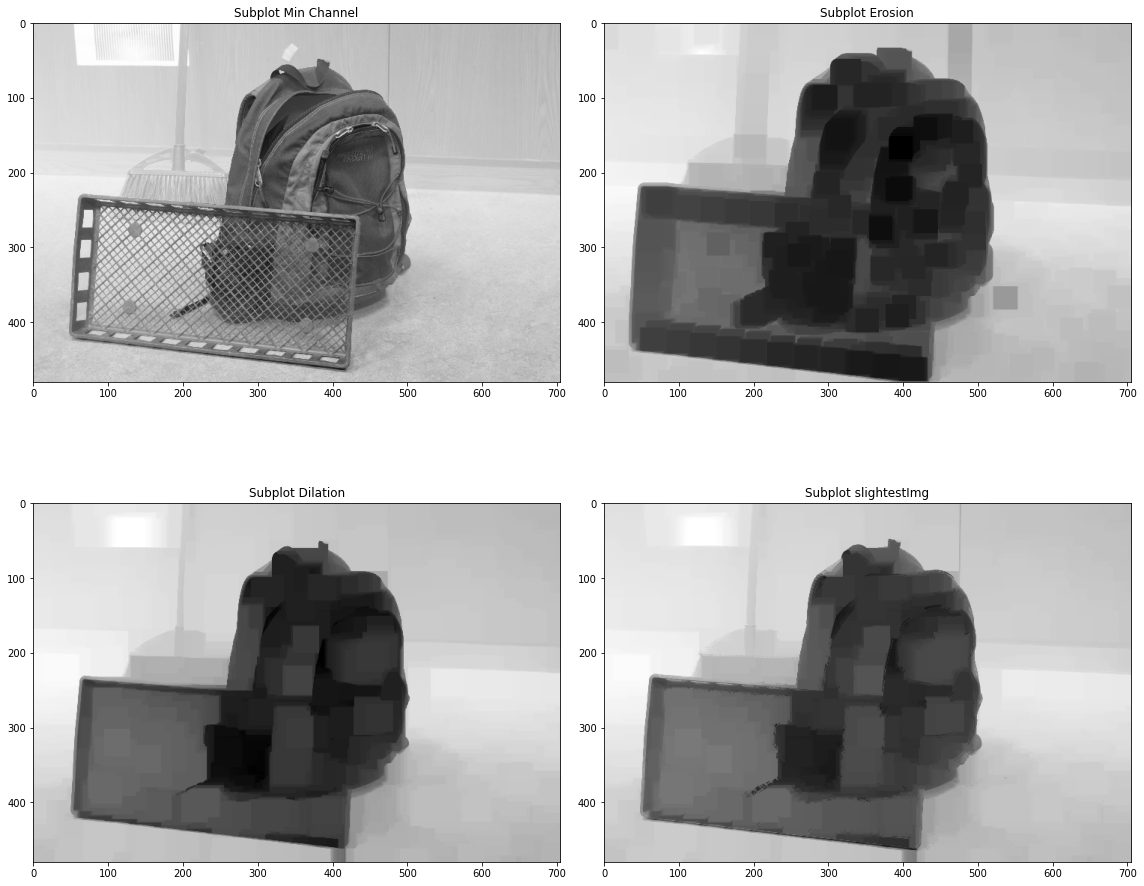

In [52]:
printImage([minChannel,img_erosion,img_dilation,Imodify],[" Min Channel"," Erosion"," Dilation"," slightestImg"])


In [39]:
# cv2.imshow('Min Channel', minChannel)
# cv2.imshow('Erosion', img_erosion)
# cv2.imshow('Dilation', img_dilation)
# cv2.imshow('slightestImg', Imodify)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Obtain global atmospheric light

<img src="../imgs/formula/atmosfericLight.png">

In [55]:
class Node(object):
    def __init__(self,x,y,value):
        self.x = x
        self.y = y
        self.value = value

    def printInfo(self):
        print('%s:%s:%s' %(self.x,self.y,self.value))

def getAtomsphericLight(darkChannel,img,meanMode = False, percent = 0.001):
    
    size = darkChannel.shape[0]*darkChannel.shape[1]
    height = darkChannel.shape[0]
    width = darkChannel.shape[1]

    nodes = []

    #
    for i in range(height):
        for j in range(width):
            oneNode = Node(i,j,darkChannel[i,j])
            nodes.append(oneNode)	

    #
    nodes = sorted(nodes, key = lambda node: node.value,reverse = True)
    # print(nodes[0].value)
    # print(nodes[1].value)
    # print(nodes[2].value)
    # print(nodes[3].value)
    # print(nodes[4].value)
    # print(nodes[len(nodes)-1].value)

    atomsphericLight = 0

    # #
    if int(percent*size) == 0:
        for i in range(3):
            if img[nodes[0].x,nodes[0].y,i] > atomsphericLight:
                atomsphericLight = img[nodes[0].x,nodes[0].y,i]
        return atomsphericLight

    # #
    # if meanMode:
    #     sum = 0
    #     for i in range(0,int(percent*size)):
    #         for j in range(0,3):
    #             sum = sum + img[nodes[i].x,nodes[i].y,j]
    #     atomsphericLight = int(sum/(int(percent*size)*3))
    #     return atomsphericLight

    #0.1%(percent)
    for i in range(int(percent*size)):
        for j in range(3):
            if img[nodes[i].x,nodes[i].y,j] > atomsphericLight:
                atomsphericLight = img[nodes[i].x,nodes[i].y,j]
    return atomsphericLight

In [56]:
print(img_resized.dtype)

uint8


In [57]:
# atomspheric Light
A_ = getAtomsphericLight(Imodify,img_resized, percent = 0.1)
print(A_)

255


### Obtain the Transmision Map

<img src="../imgs/formula/TransmisionMap.png">

In [69]:
imgDark = np.float64(Imodify)
omega = 0.9 #ω is used to preserve distant haze, usually fixed as 0.9.
transmission = 1 - (omega * (imgDark / A_))
transmission_for_Saturation = transmission.copy()

In [70]:
print(transmission)

[[0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 [0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 [0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 ...
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]]


### Recover the value channel (Value)

<img src="../imgs/formula/RecoverIntensity.png">

In [71]:
t0 = 0.1
transmission[transmission<t0] = t0

In [72]:
print(transmission)

[[0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 [0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 [0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 ...
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]]


In [73]:
channel_VFloat = np.float64(channel_V)
numeratorR = channel_VFloat - A_
denominatorR = transmission
print(channel_V.dtype)
print(channel_VFloat.dtype)
print(numeratorR.dtype)
print(denominatorR.dtype)

uint8
float64
float64
float64


In [74]:
recoValue = A_ + (numeratorR/denominatorR)
recoValue = np.uint8(recoValue)

[[227 223 231 ... 206 212 218]
 [227 223 223 ... 212 209 221]
 [227 223 223 ... 209 209 221]
 ...
 [179 170 191 ... 169 130 105]
 [182 158 143 ... 108 158 155]
 [185 199 185 ... 135 141 141]]


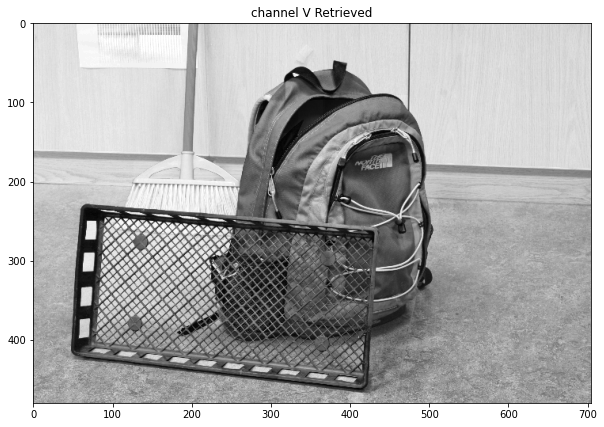

In [75]:
print(recoValue)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("channel V Retrieved")  
plt.imshow(recoValue,cmap='gray')

In [76]:

# cv2.imshow('channel V Retrieved', recoValue)
# recoValueInv = abs(255-recoValue)
# cv2.imshow('channel V Retrieved Inverso', recoValueInv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

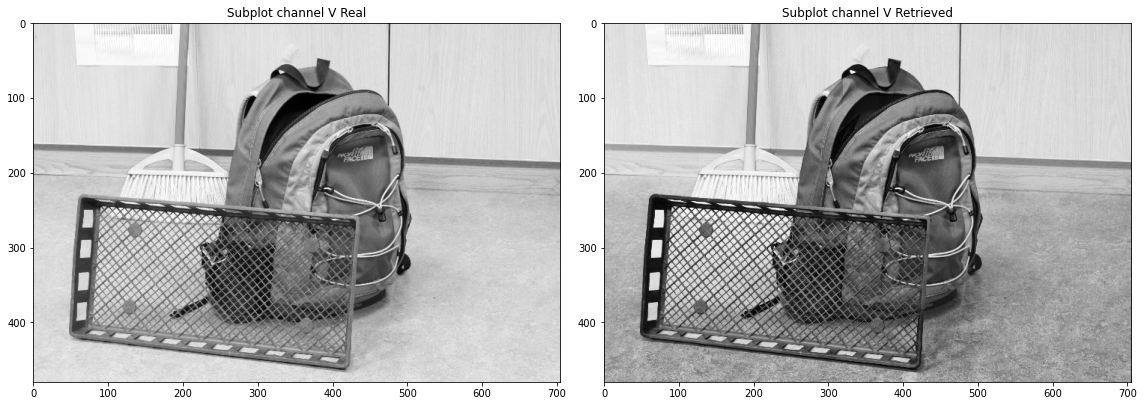

In [77]:
printImage([channelReal_V,recoValue],[" channel V Real"," channel V Retrieved"])


In [78]:
cv2.imshow('channel V Real', channelReal_V) #canal a donde se quiere llegar (Y)
cv2.imshow('channel V Retrieved', recoValue)
cv2.waitKey(0)
cv2.destroyAllWindows()

## SATURATION RECOVERY MODULE

<img src="../imgs/formula/Saturationrecovery.png">

The value channel in HSV color space is the maximum image of RGB.

In [89]:
transmission_for_Saturation = transmission.copy()
print(transmission_for_Saturation.dtype)
print(transmission_for_Saturation)

float64
[[0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 [0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 [0.25176471 0.25176471 0.25176471 ... 0.35058824 0.35058824 0.35764706]
 ...
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]
 [0.34352941 0.34352941 0.33294118 ... 0.36117647 0.36117647 0.36117647]]


In [90]:
transmission_for_Saturation = transmission_for_Saturation - 1

In [91]:
#comprobando que V es el maximo de RGB
print(channel_V[0][0])
print(img_resized[0][0])

248
[215 238 248]


In [92]:
maximumRGB = channel_V.copy()
equation_1 = A_ * transmission_for_Saturation
equation_2 = equation_1/maximumRGB

In [93]:
print(maximumRGB.shape)
print(equation_1.shape)

(480, 705)
(480, 705)


In [94]:
print(equation_2.dtype)

float64


In [95]:
channel_SFloat = np.float64(channel_S)

In [96]:
recoSaturation = channel_SFloat * (1/(1+equation_2))
recoSaturation = np.uint8(recoSaturation)

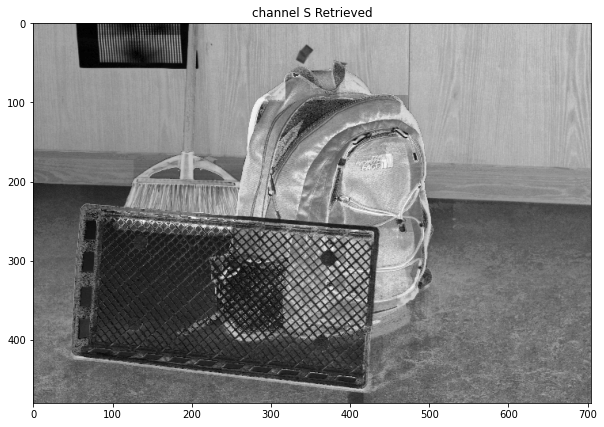

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("channel S Retrieved")  
plt.imshow(recoSaturation,cmap='gray')

In [88]:
cv2.imshow('channel S Retrieved', recoSaturation)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Comparacion S y S recovered

In [133]:
# cv2.imshow('channel S Real', channelReal_S) #canal a donde se quiere llegar (Y)
# cv2.imshow('channel S hazy', channel_S)
# cv2.imshow('channel S Retrieved', recoSaturation)

# recoSaturationInv = abs(255-recoSaturation)
# cv2.imshow('channel S Retrieved Inverso', recoSaturationInv)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

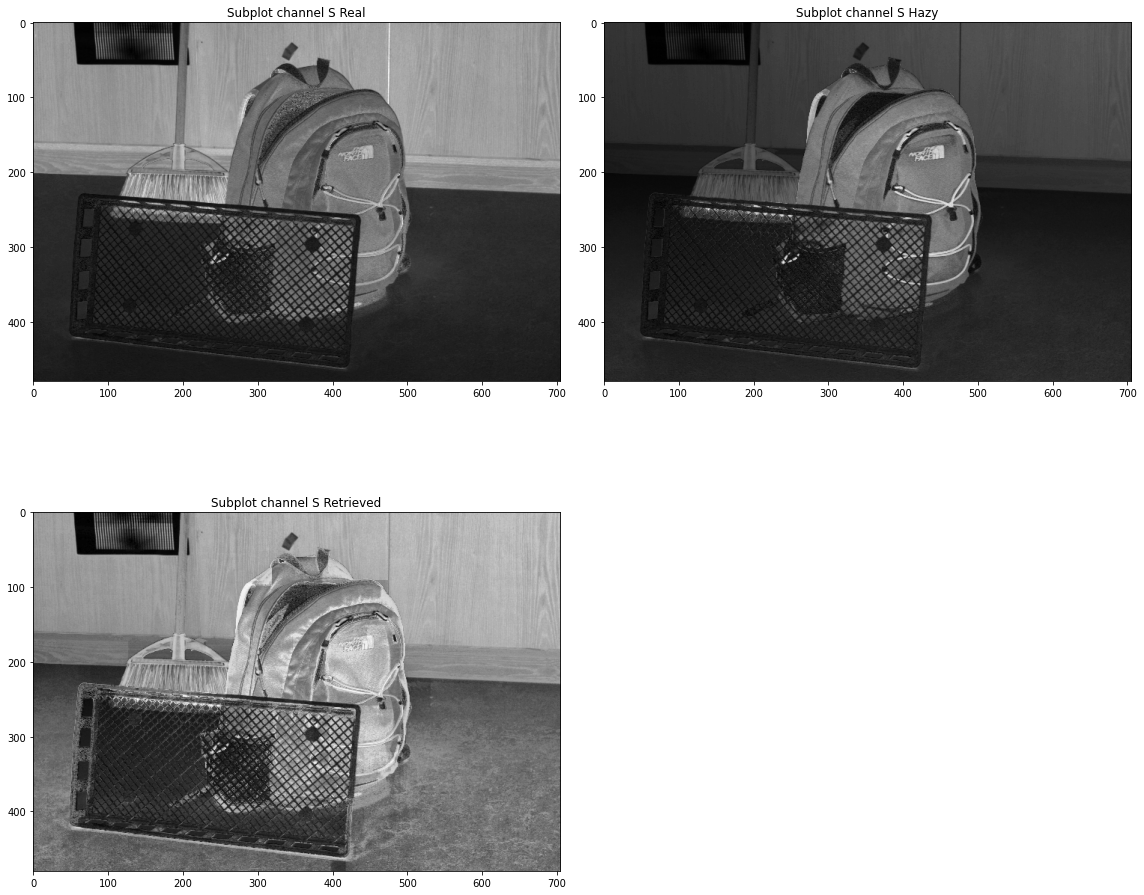

In [98]:
printImage([channelReal_S,channel_S,recoSaturation],[" channel S Real"," channel S Hazy", " channel S Retrieved"])


## Result

In [99]:

mergedDehazing = cv2.merge([channel_H,recoSaturation,recoValue])
bgrimg = cv2.cvtColor(mergedDehazing, cv2.COLOR_HSV2BGR)



In [152]:
#printImage([img_resizedReal,img_resized,bgrimg],[" Image Ground Truth"," Hazy Image"," Dezahing Image ",])

In [100]:
cv2.imshow("Image Ground Truth", img_resizedReal)
cv2.imshow("Hazy Image", img_resized)
cv2.imshow("Dezahing Image ", bgrimg)
cv2.waitKey (0)
cv2.destroyAllWindows()

## caso general
